## **Theoretical**

Here are the **theoretical questions with concise answers** for your Ensemble Learning assignment:

---

**1. Can we use Bagging for regression problems?**
Yes, Bagging can be used for regression by averaging predictions from multiple regressors to reduce variance.

**2. What is the difference between multiple model training and single model training?**
Multiple model training combines predictions from several models for better performance; single model training relies on one model, which may overfit or underperform.

**3. Explain the concept of feature randomness in Random Forest.**
At each split, Random Forest selects a random subset of features, increasing diversity and reducing correlation between trees.

**4. What is OOB (Out-of-Bag) Score?**
OOB score is an internal validation method in Bagging where each sample is validated using trees that didn’t see it during training.

**5. How can you measure the importance of features in a Random Forest model?**
By measuring the decrease in impurity or accuracy when a feature is used to split data across all trees.

**6. Explain the working principle of a Bagging Classifier.**
It trains multiple base classifiers on random bootstrap samples and aggregates their predictions via majority vote.

**7. How do you evaluate a Bagging Classifier’s performance?**
Using metrics like accuracy, precision, recall, F1-score, and possibly cross-validation or OOB score.

**8. How does a Bagging Regressor work?**
It trains regressors on different bootstrapped samples and averages their outputs to make predictions.

**9. What is the main advantage of ensemble techniques?**
Improved accuracy, robustness, and generalization by combining multiple models.

**10. What is the main challenge of ensemble methods?**
Increased complexity, computational cost, and reduced interpretability.

**11. Explain the key idea behind ensemble techniques.**
Combine multiple models to reduce variance, bias, or improve predictions beyond individual models.

**12. What is a Random Forest Classifier?**
An ensemble of decision trees trained with feature and data randomness, using majority voting for classification.

**13. What are the main types of ensemble techniques?**
Bagging, Boosting, and Stacking.

**14. What is ensemble learning in machine learning?**
A method that combines multiple models to produce better predictive performance than individual ones.

**15. When should we avoid using ensemble methods?**
When data is small, models are already highly accurate, or when interpretability and low computation are critical.

**16. How does Bagging help in reducing overfitting?**
By averaging diverse models trained on different data samples, reducing variance.

**17. Why is Random Forest better than a single Decision Tree?**
It reduces overfitting and variance by aggregating predictions from many trees trained with randomness.

**18. What is the role of bootstrap sampling in Bagging?**
It provides diverse training sets by sampling with replacement, encouraging model variance.

**19. What are some real-world applications of ensemble techniques?**
Fraud detection, recommendation systems, medical diagnosis, stock prediction, and image classification.

**20. What is the difference between Bagging and Boosting?**
Bagging trains models independently in parallel; Boosting trains sequentially with each model correcting the previous one.



In [1]:
## Practical questions

In [12]:
# 1. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))


Bagging Classifier Accuracy: 0.9210526315789473


In [13]:
# 2. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)
print("Bagging Regressor MSE:", mean_squared_error(y_test, y_pred))


Bagging Regressor MSE: 3096.3144324324335


In [4]:
# 3. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
importances = rf_clf.feature_importances_

for feature, score in zip(load_breast_cancer().feature_names, importances):
    print(f"{feature}: {score:.4f}")


mean radius: 0.0397
mean texture: 0.0146
mean perimeter: 0.0531
mean area: 0.0428
mean smoothness: 0.0082
mean compactness: 0.0114
mean concavity: 0.0832
mean concave points: 0.0903
mean symmetry: 0.0044
mean fractal dimension: 0.0044
radius error: 0.0195
texture error: 0.0046
perimeter error: 0.0087
area error: 0.0436
smoothness error: 0.0046
compactness error: 0.0037
concavity error: 0.0070
concave points error: 0.0050
symmetry error: 0.0037
fractal dimension error: 0.0066
worst radius: 0.0813
worst texture: 0.0165
worst perimeter: 0.0714
worst area: 0.1232
worst smoothness: 0.0103
worst compactness: 0.0158
worst concavity: 0.0317
worst concave points: 0.1723
worst symmetry: 0.0131
worst fractal dimension: 0.0052


In [5]:
# 4. Train a Random Forest Regressor and compare its performance with a single Decision Tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
tree_reg = DecisionTreeRegressor(random_state=42)

rf_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)

rf_pred = rf_reg.predict(X_test)
tree_pred = tree_reg.predict(X_test)

print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Decision Tree MSE:", mean_squared_error(y_test, tree_pred))


Random Forest MSE: 0.0337993006993007
Decision Tree MSE: 0.04895104895104895


In [6]:
# 5. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train, y_train)
print("OOB Score:", rf_oob.oob_score_)


OOB Score: 0.960093896713615


In [14]:
# 6. Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
bag_svm = BaggingClassifier(estimator=svm_pipeline, n_estimators=10, random_state=42)
bag_svm.fit(X_train, y_train)
y_pred = bag_svm.predict(X_test)
print("Bagging SVM Classifier Accuracy:", accuracy_score(y_test, y_pred))


Bagging SVM Classifier Accuracy: 0.009009009009009009


In [8]:
# 7. Train a Random Forest Classifier with different numbers of trees and compare accuracy
for n in [10, 50, 100, 200]:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"Accuracy with {n} trees: {acc}")


Accuracy with 10 trees: 0.951048951048951
Accuracy with 50 trees: 0.972027972027972
Accuracy with 100 trees: 0.965034965034965
Accuracy with 200 trees: 0.965034965034965


In [17]:
# 8. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

log_pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='liblinear'))
bag_log = BaggingClassifier(estimator=log_pipeline, n_estimators=10, random_state=42)
bag_log.fit(X_train, y_train)
y_prob = bag_log.predict_proba(X_test)[:, 1]
print("Bagging Logistic Regression AUC:", roc_auc_score(y_test, y_prob))


Bagging Logistic Regression AUC: 0.9974842767295597


In [10]:
# 9. Train a Random Forest Regressor and analyze feature importance scores
rf_reg.fit(X_train, y_train)
importances = rf_reg.feature_importances_

for feature, score in zip(load_diabetes().feature_names, importances):
    print(f"{feature}: {score:.4f}")


age: 0.0041
sex: 0.0176
bmi: 0.0031
bp: 0.0063
s1: 0.0034
s2: 0.0007
s3: 0.0019
s4: 0.3210
s5: 0.0020
s6: 0.0030


In [16]:
# 10. Train an ensemble model using both Bagging and Random Forest and compare accuracy
from sklearn.ensemble import RandomForestClassifier

bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

bag_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

bag_acc = accuracy_score(y_test, bag_model.predict(X_test))
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))

print("Bagging Accuracy:", bag_acc)
print("Random Forest Accuracy:", rf_acc)


Bagging Accuracy: 0.0
Random Forest Accuracy: 0.009009009009009009


In [18]:
# 11. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9600547195622434


In [19]:
# 12. Train a Bagging Regressor with different numbers of base estimators and compare performance
from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for n in [10, 50, 100]:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Estimators: {n}, MSE: {mean_squared_error(y_test, y_pred)}")


Estimators: 10, MSE: 3333.257117117116
Estimators: 50, MSE: 3096.3144324324335
Estimators: 100, MSE: 3028.580902702703


In [20]:
# 13. Train a Random Forest Classifier and analyze misclassified samples
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

misclassified = (y_test != y_pred)
print("Misclassified sample indices:", [i for i, m in enumerate(misclassified) if m])


Misclassified sample indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]


In [21]:
# 14. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier()
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

tree.fit(X_train, y_train)
bag.fit(X_train, y_train)

print("Decision Tree Accuracy:", accuracy_score(y_test, tree.predict(X_test)))
print("Bagging Classifier Accuracy:", accuracy_score(y_test, bag.predict(X_test)))


Decision Tree Accuracy: 0.0
Bagging Classifier Accuracy: 0.0


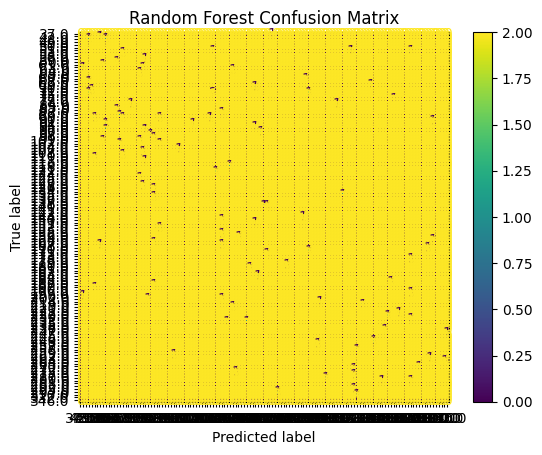

In [22]:
# 15. Train a Random Forest Classifier and visualize the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()


In [23]:
# 16. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', make_pipeline(StandardScaler(), SVC(probability=True)))
]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
print("Stacking Classifier Accuracy:", stack.score(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in training fold (176) does not match total number of classes (196). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in training fold (175) does not match total number of classes (196). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in trainin

Stacking Classifier Accuracy: 0.0


In [24]:
# 17. Train a Random Forest Classifier and print the top 5 most important features
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
top_indices = importances.argsort()[-5:][::-1]
features = load_breast_cancer().feature_names
for idx in top_indices:
    print(f"{features[idx]}: {importances[idx]:.4f}")


mean perimeter: 0.1211
mean symmetry: 0.1191
mean area: 0.1180
mean fractal dimension: 0.1146
mean smoothness: 0.1112


In [33]:
# 18. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

print("Precision:", precision_score(y_test, y_pred, average='binary'))
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1-score:", f1_score(y_test, y_pred, average='binary'))


Precision: 0.9560439560439561
Recall: 0.9666666666666667
F1-score: 0.9613259668508287


In [26]:
# 19. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
for depth in [None, 5, 10, 15]:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"Max Depth: {depth}, Accuracy: {acc}")


Max Depth: None, Accuracy: 0.0
Max Depth: 5, Accuracy: 0.0
Max Depth: 10, Accuracy: 0.0
Max Depth: 15, Accuracy: 0.0


In [27]:
# 20. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
from sklearn.neighbors import KNeighborsRegressor

for estimator in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    name = estimator.__class__.__name__
    model = BaggingRegressor(estimator=estimator, n_estimators=50, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} MSE:", mean_squared_error(y_test, y_pred))


DecisionTreeRegressor MSE: 3096.3144324324335
KNeighborsRegressor MSE: 2986.6139022702705


In [34]:
# 21. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_prob = rf.predict_proba(X_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


ROC AUC Score: 0.9949685534591195


In [29]:
# 22. Train a Bagging Classifier and evaluate its performance using cross-validation
from sklearn.model_selection import cross_val_score

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
scores = cross_val_score(bag, X, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation Accuracy Scores: [0.         0.01123596 0.03409091 0.         0.        ]
Mean Accuracy: 0.009065372829417773


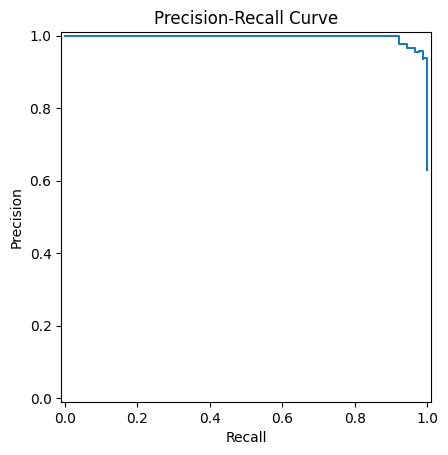

In [35]:
# 23. Train a Random Forest Classifier and plot the Precision-Recall curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_scores = rf.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()


In [31]:
# 24. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('log', make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)))
]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
print("Stacking Accuracy:", stack.score(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in training fold (176) does not match total number of classes (196). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in training fold (175) does not match total number of classes (196). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in trainin

Stacking Accuracy: 0.009009009009009009


In [32]:
# 25. Train a Bagging Regressor with different levels of bootstrap samples and compare performance
for max_samples in [0.5, 0.7, 1.0]:
    bag = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, max_samples=max_samples, random_state=42)
    bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)
    print(f"Max Samples: {max_samples}, MSE: {mean_squared_error(y_test, y_pred)}")


Max Samples: 0.5, MSE: 2998.6932
Max Samples: 0.7, MSE: 2892.7070090090083
Max Samples: 1.0, MSE: 3096.3144324324335
